In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

In [2]:
# Load the dataset from the local directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset/train',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset/test',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    label_mode='int'
)

class_names = train_dataset.class_names

Found 7967 files belonging to 3 classes.
Found 1593 files belonging to 3 classes.


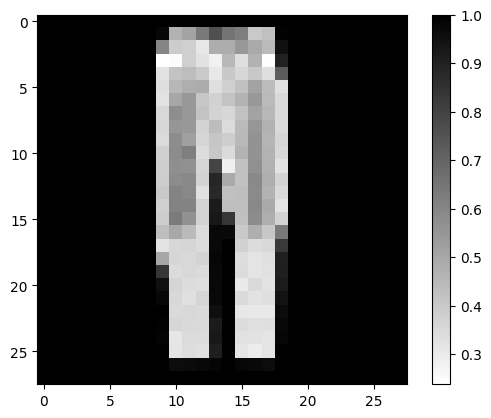

In [3]:
# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Display the first image from the training dataset
plt.figure()
for images, labels in train_dataset.take(1):
    plt.imshow(images[0].numpy().squeeze(), cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [4]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [6]:
model.fit(train_dataset, epochs=30)

Epoch 1/30
249/249 [==============================] - 10s 35ms/step - loss: 0.4503 - accuracy: 0.8201
Epoch 2/30
249/249 [==============================] - 3s 10ms/step - loss: 0.2577 - accuracy: 0.9087
Epoch 3/30
249/249 [==============================] - 3s 11ms/step - loss: 0.2061 - accuracy: 0.9282
Epoch 4/30
249/249 [==============================] - 3s 13ms/step - loss: 0.1667 - accuracy: 0.9405
Epoch 5/30
249/249 [==============================] - 4s 14ms/step - loss: 0.1381 - accuracy: 0.9522
Epoch 6/30
249/249 [==============================] - 3s 12ms/step - loss: 0.1130 - accuracy: 0.9618
Epoch 7/30
249/249 [==============================] - 3s 12ms/step - loss: 0.0881 - accuracy: 0.9695
Epoch 8/30
249/249 [==============================] - 3s 12ms/step - loss: 0.0722 - accuracy: 0.9741
Epoch 9/30
249/249 [==============================] - 3s 12ms/step - loss: 0.0542 - accuracy: 0.9814
Epoch 10/30
249/249 [==============================] - 3s 11ms/step - loss: 0.0436 - accur

In [7]:
model.save("model")
model.save_weights("model_weights")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [8]:
loaded_model = tf.keras.models.load_model('model')
test_loss, test_acc = loaded_model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = loaded_model.predict(test_dataset)

50/50 - 1s - loss: 0.0162 - accuracy: 0.9950 - 1s/epoch - 21ms/step

Test accuracy: 0.9949780106544495
50/50 [==============================] - 1s 7ms/step
